In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

--2019-10-15 11:51:31--  https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py [following]
--2019-10-15 11:51:32--  https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10609 (10K) [text/plain]
Saving to: ‘lab_helper.py’

lab_helper.py       100%[===================>]  10.36K  --.-KB/s    in 0s      

2019-10-15 11:51:32 (112 MB/s) - ‘lab_helper.py’ saved [10609/10609]



In [0]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

In [0]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del dataset

In [0]:
#X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

In [113]:
X.shape

(500, 2)

In [114]:
y.shape

(500,)

In [0]:
#X = np.vstack([X,[2, -0.97]]) #agrego un punto azul para probar de mejorar la clasificacion

In [0]:
#y = np.hstack([y, 1]) #agrego la clase del punto que agregué

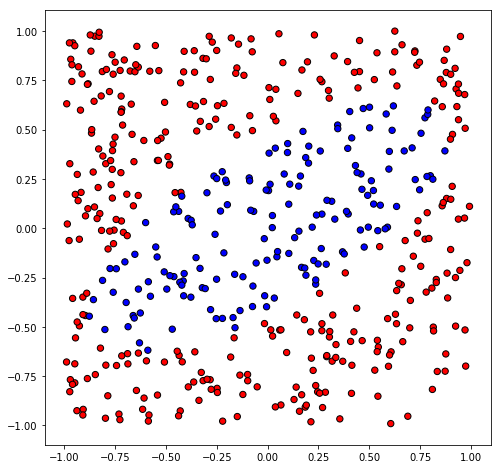

In [117]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [0]:
model = LogisticRegression(solver='lbfgs', C=1) #aca se pueden cambiar hyperparm para probar, como C por ejemplo

In [127]:
model.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

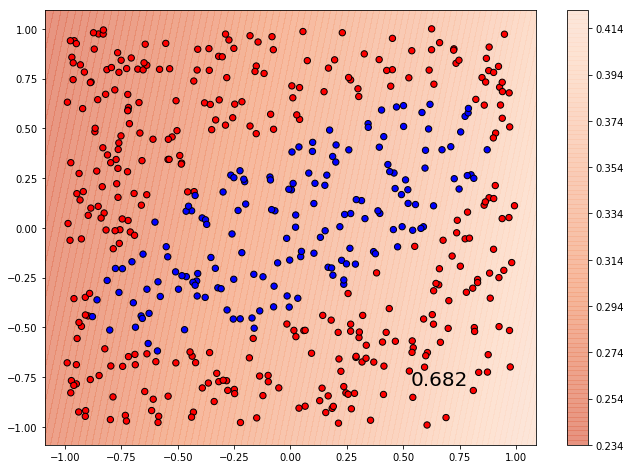

In [128]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [129]:
model.predict_proba(np.array([0.5, -0.75]).reshape(1,2)) #pregunta 3.1 hay que hacer el reshape para obtener las probabilidades

array([[0.63053289, 0.36946711]])

In [130]:
model.predict_proba(np.array([[0.5, -0.75]])) #pregunta 3.2 hay que hacer el reshape para obtener las probabilidades

array([[0.63053289, 0.36946711]])

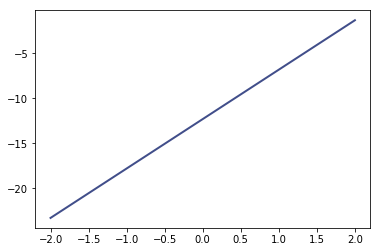

In [131]:
x1 = np.linspace(-2, 2, 100)
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1] #coef_[0][0] es beta 1 y #coef_[0][2] es beta 2
plt.plot(x1, x2, color='#414e8a', linewidth=2)

In [134]:
-model.coef_[0][0] / model.coef_[0][1] #pendiente de la recta es depejar X2

5.49035121886291

In [135]:
-model.intercept_[0] / model.coef_[0][1] #ordenada a la origen

-12.28977925697609

In [77]:
model.coef_ #coeficientes B1 y B2 (Beta1 y Beta2) que calcula el modelo. Conclusion: coef altos da modelos mas seguros (ojo al overfitting)

array([[ 0.36958713, -0.09555998]])

In [78]:
model.intercept_ #Beta 0

array([-0.73502347])

# Regresión polinomial

In [11]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [12]:
# Completar la función 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, , axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X, , axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

SyntaxError: ignored

In [0]:
add_columns(X).shape

(500, 6)

In [0]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False)

In [0]:
model_poly.fit(add_columns(X), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

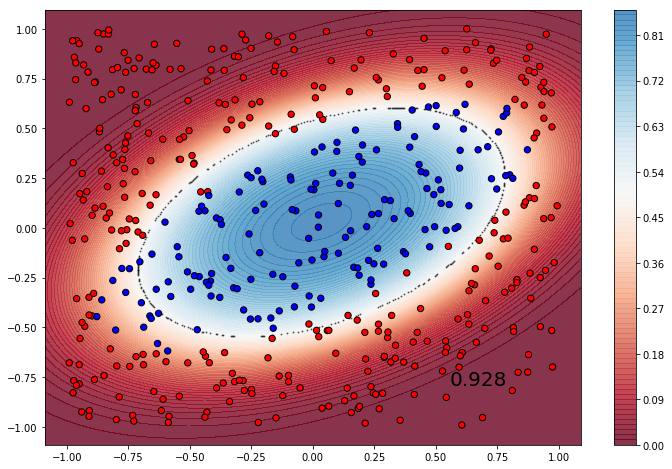

In [0]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

# Regularización

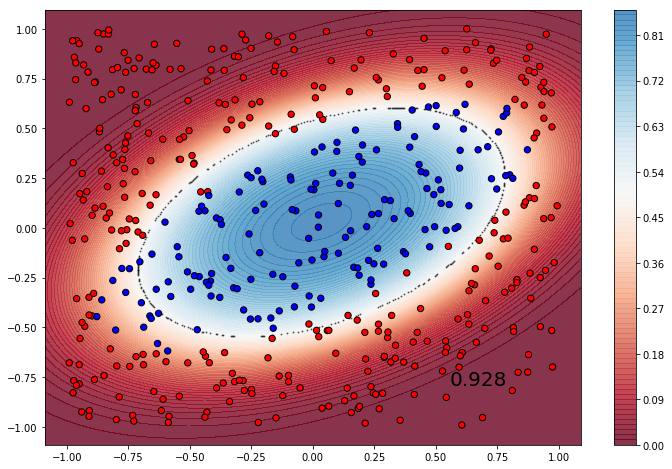

In [0]:
C = 1 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)